In [0]:
# import necessary toolkits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

In [0]:
file = "data2.csv"
data = pd.read_csv(file)
data.head()

,Application_SK,AgencyCountryName,ParentAgencyName,AgencyName,TeachingPeriodStart,MarketingSemester_SK,MarketingSemester,FinancialYear,TeachingPeriodStart.1,EntityProviderCode,SubDivisionCode,CampusCountry,CitizenshipTerritory,CitizenshipCountry,RecruitmentTerritory,RecruitmentCountry,IsMainCampus,IsManagedCampus,StudentCitizenship_SK,StudentLocation_SK,Student_SK,Agency_SK,Campus_SK,RecruitmentCountry_SK,CitizenshipCountry_SK,IsOffer,IsApplication,StudylinkStatus_SK,IsAcceptedOffer
0,0069000000lS2JYAA0-sf,Australia,DIRAUJMP - Direct Enrolment Australia,DIRAUJMP - Direct Enrolment Australia,2016-06-27,201602.0,201602.0,2017.0,2016-06-27,SAIBT,UPA,Australia,ANZ,Australia,ANZ,Australia,0,0,International,OnShore,100216-nav,0019000000LSzK5AAL-sf,154-nav-74-nav,AUS,AUS,0,1,Cancelled-sl,0
1,0062j00000Ca7tBAAR-sf,Australia,DIRECT - Direct Enrolment,DIRECT - Direct Enrolment,2023-05-22,202302.0,202302.0,2024.0,2023-05-22,UPIC,UPE,United Kingdom,West Africa,Nigeria,West Africa,Nigeria,0,0,International,OffShore,1017622-nav,00190000008iCG0AAM-sf,180-nav-37-nav,NGA,NGA,1,0,Cancelled-sl,0
2,0062j00000CfpNSAAZ-sf,Australia,DIRECT - Direct Enrolment,DIRECT - Direct Enrolment,2024-02-19,202401.0,202401.0,2024.0,2024-02-19,CC,UPA,Australia,South Asia,India,South Asia,India,0,0,International,OffShore,1017783-nav,00190000008iCG0AAM-sf,48-nav-190-nav,IND,IND,1,0,Assessing - Third Party-sl,0
3,NaN,Kuwait,EASYAPLY - Easy Apply Commission Agent Establi...,EASYAPLY - Easy Apply Commission Agent Establi...,2023-09-18,202303.0,202303.0,2024.0,2023-09-18,ICP,UPE,United Kingdom,Middle East,Kuwait,Middle East,Kuwait,0,0,International,OffShore,1018578-nav,00190000018Mws2AAC-sf,174-nav-29-nav,KWT,KWT,1,0,Conditional Offer-sl,0
4,0062j00000DbQ50AAF-sf,Pakistan,HRCONIAN - HR Consultants (Private) Limited,HRCONIAN - HR Consultants (Private) Limited,2024-01-29,202401.0,202401.0,2024.0,2024-01-29,BCUIC,UPE,United Kingdom,PAKISTAN,Pakistan,PAKISTAN,Pakistan,0,0,International,OffShore,1022617-nav,00190000008iCJ7AAM-sf,103-nav-80-nav,PAK,PAK,1,0,Cancelled-sl,0


In [0]:
# Checking for missing values in the dataset
missvalue = data.isnull().sum()
missvalue = missvalue[missvalue > 0]

misssummary = pd.DataFrame({
    'Column': missvalue.index,
    'Missing Values': missvalue.values,
    'Percentage Missing': (missvalue.values / len(data)) * 100
})

misssummary

,Column,Missing Values,Percentage Missing
0,Application_SK,933,16.741432
1,MarketingSemester_SK,447,8.020815
2,MarketingSemester,507,9.097434
3,FinancialYear,447,8.020815
4,StudentCitizenship_SK,1,0.017944


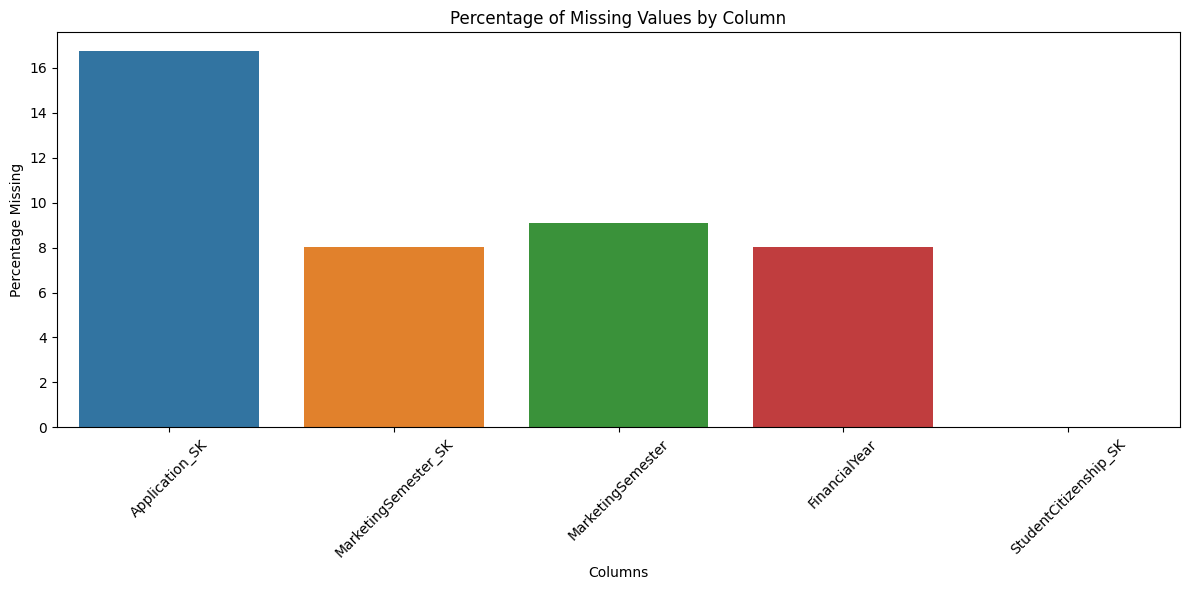

In [0]:
# plot the missing value
plt.figure(figsize=(12, 6))
sns.barplot(x=misssummary['Column'], y=misssummary['Percentage Missing'])
plt.xticks(rotation=45)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage Missing')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

In [0]:
# Dropping missing values rows in MarketingSemester_SK, MarketingSemester, FinancialYear
cleancolumn = ['MarketingSemester_SK', 'MarketingSemester', 'FinancialYear']

# Dropping rows whith missing values
data = data.dropna(subset=cleancolumn)

# delete unnecessary columns
data = data.reset_index(drop=True)
data.insert(0, 'Application_Index', data.index + 1)

data = data.drop(columns=['Application_SK'])

# Displaying the first few rows to confirm the changes
data.head()

,Application_Index,AgencyCountryName,ParentAgencyName,AgencyName,TeachingPeriodStart,MarketingSemester_SK,MarketingSemester,FinancialYear,TeachingPeriodStart.1,EntityProviderCode,SubDivisionCode,CampusCountry,CitizenshipTerritory,CitizenshipCountry,RecruitmentTerritory,RecruitmentCountry,IsMainCampus,IsManagedCampus,StudentCitizenship_SK,StudentLocation_SK,Student_SK,Agency_SK,Campus_SK,RecruitmentCountry_SK,CitizenshipCountry_SK,IsOffer,IsApplication,StudylinkStatus_SK,IsAcceptedOffer
0,1,Australia,DIRAUJMP - Direct Enrolment Australia,DIRAUJMP - Direct Enrolment Australia,2016-06-27,201602.0,201602.0,2017.0,2016-06-27,SAIBT,UPA,Australia,ANZ,Australia,ANZ,Australia,0,0,International,OnShore,100216-nav,0019000000LSzK5AAL-sf,154-nav-74-nav,AUS,AUS,0,1,Cancelled-sl,0
1,2,Australia,DIRECT - Direct Enrolment,DIRECT - Direct Enrolment,2023-05-22,202302.0,202302.0,2024.0,2023-05-22,UPIC,UPE,United Kingdom,West Africa,Nigeria,West Africa,Nigeria,0,0,International,OffShore,1017622-nav,00190000008iCG0AAM-sf,180-nav-37-nav,NGA,NGA,1,0,Cancelled-sl,0
2,3,Australia,DIRECT - Direct Enrolment,DIRECT - Direct Enrolment,2024-02-19,202401.0,202401.0,2024.0,2024-02-19,CC,UPA,Australia,South Asia,India,South Asia,India,0,0,International,OffShore,1017783-nav,00190000008iCG0AAM-sf,48-nav-190-nav,IND,IND,1,0,Assessing - Third Party-sl,0
3,4,Kuwait,EASYAPLY - Easy Apply Commission Agent Establi...,EASYAPLY - Easy Apply Commission Agent Establi...,2023-09-18,202303.0,202303.0,2024.0,2023-09-18,ICP,UPE,United Kingdom,Middle East,Kuwait,Middle East,Kuwait,0,0,International,OffShore,1018578-nav,00190000018Mws2AAC-sf,174-nav-29-nav,KWT,KWT,1,0,Conditional Offer-sl,0
4,5,Pakistan,HRCONIAN - HR Consultants (Private) Limited,HRCONIAN - HR Consultants (Private) Limited,2024-01-29,202401.0,202401.0,2024.0,2024-01-29,BCUIC,UPE,United Kingdom,PAKISTAN,Pakistan,PAKISTAN,Pakistan,0,0,International,OffShore,1022617-nav,00190000008iCJ7AAM-sf,103-nav-80-nav,PAK,PAK,1,0,Cancelled-sl,0


In [0]:
# check two columns are the same
teachingcolumnssame = data['TeachingPeriodStart'].equals(data['TeachingPeriodStart.1'])

inconsistentscolumns = data[(data['MarketingSemester_SK'] != data['MarketingSemester']) & data['MarketingSemester_SK'].notnull() & data['MarketingSemester'].notnull()]

# Summarizing the findings
findingcheck = {
    'TeachingPeriodStart Columns Identical': teachingcolumnssame,
    'Inconsistent MarketingSemester Rows': len(inconsistentscolumns),
    'Column Data Types': data.dtypes
}

findingcheck

{'TeachingPeriodStart Columns Identical': True,
 'Inconsistent MarketingSemester Rows': 0,
 'Column Data Types': Application_Index          int64
 AgencyCountryName         object
 ParentAgencyName          object
 AgencyName                object
 TeachingPeriodStart       object
 MarketingSemester_SK     float64
 MarketingSemester        float64
 FinancialYear            float64
 TeachingPeriodStart.1     object
 EntityProviderCode        object
 SubDivisionCode           object
 CampusCountry             object
 CitizenshipTerritory      object
 CitizenshipCountry        object
 RecruitmentTerritory      object
 RecruitmentCountry        object
 IsMainCampus               int64
 IsManagedCampus            int64
 StudentCitizenship_SK     object
 StudentLocation_SK        object
 Student_SK                object
 Agency_SK                 object
 Campus_SK                 object
 RecruitmentCountry_SK     object
 CitizenshipCountry_SK     object
 IsOffer                    int64
 IsA

In [0]:
#change the date format
data['TeachingPeriodStart'] = pd.to_datetime(data['TeachingPeriodStart'], errors='coerce')
data['TeachingPeriodStart.1'] = pd.to_datetime(data['TeachingPeriodStart.1'], errors='coerce')

# Checking for conversion errors
dateconversionerrors = data[['TeachingPeriodStart', 'TeachingPeriodStart.1']].isnull().sum()
dateconversionerrors


TeachingPeriodStart      0
TeachingPeriodStart.1    0
dtype: int64

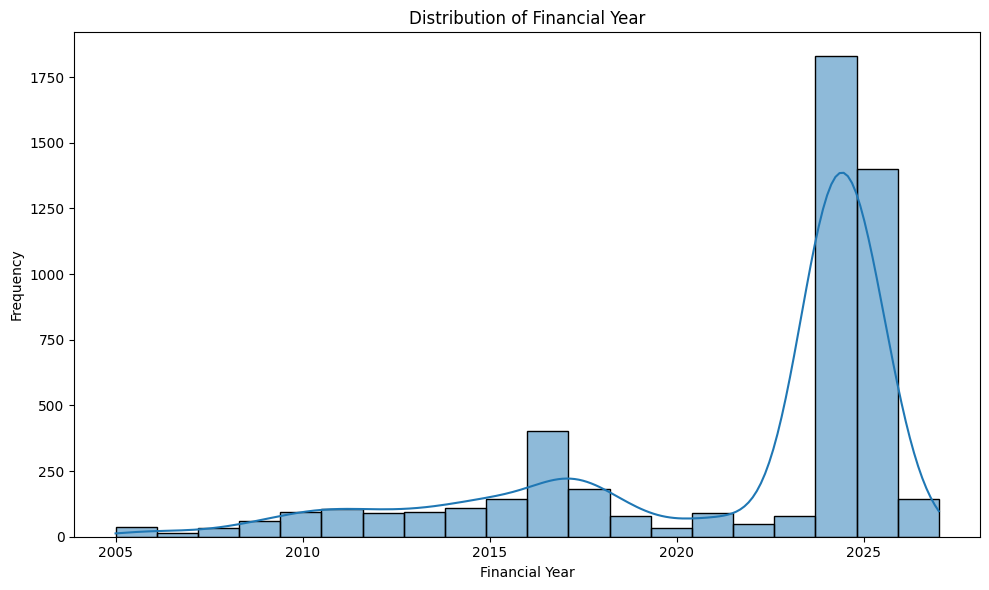

In [0]:
# Plotting the distribution of financial year
plt.figure(figsize=(10, 6))
sns.histplot(data['FinancialYear'].dropna(), bins=20, kde=True)
plt.title('Distribution of Financial Year')
plt.xlabel('Financial Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

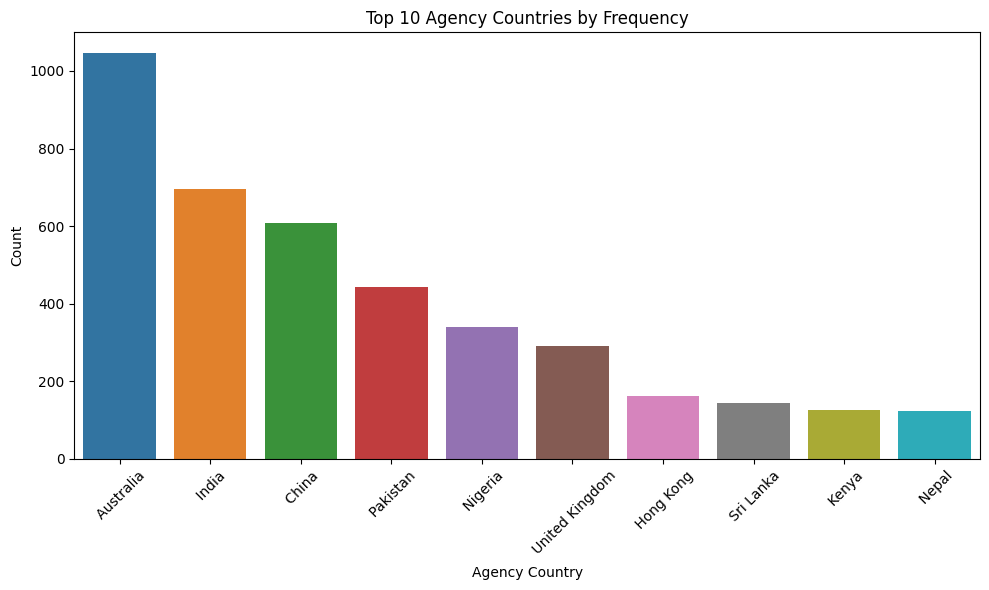

In [0]:
# Plotting the distribution of teaching period start
countriestop = data['AgencyCountryName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=countriestop.index, y=countriestop.values)
plt.xticks(rotation=45)
plt.title('Top 10 Agency Countries by Frequency')
plt.ylabel('Count')
plt.xlabel('Agency Country')
plt.tight_layout()
plt.show()

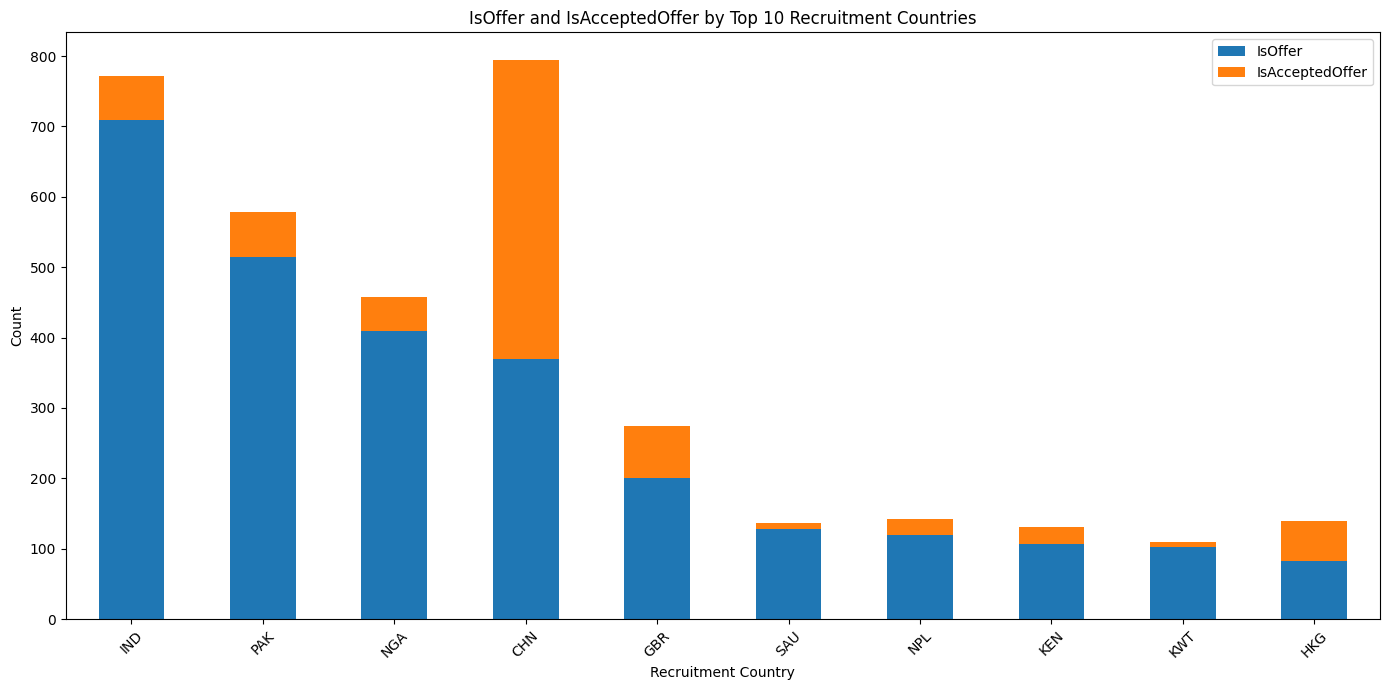

In [0]:
# Plotting the distribution of teaching period start
segmentcounts = data.groupby('RecruitmentCountry_SK')[['IsOffer', 'IsAcceptedOffer']].sum().sort_values(by='IsOffer', ascending=False).head(10)
segmentcounts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('IsOffer and IsAcceptedOffer by Top 10 Recruitment Countries')
plt.ylabel('Count')
plt.xlabel('Recruitment Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

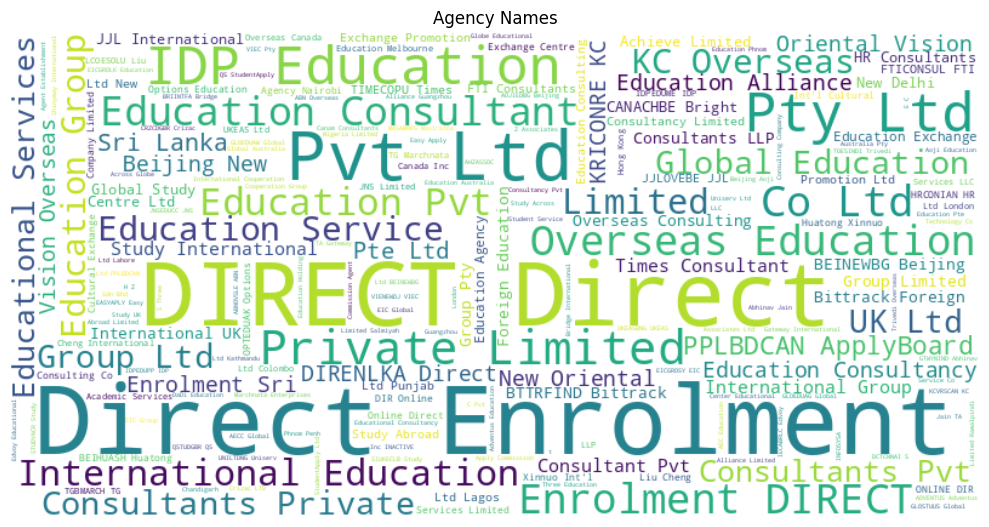

In [0]:
# Plotting the wordcould
plt.figure(figsize=(10, 6))
text = ' '.join(data['AgencyName'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Agency Names')
plt.tight_layout()
plt.show()